First mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 61.0 MB/s eta 0:00:00


In [4]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
gdf= gpd.read_file("/content/drive/MyDrive/NewYorkInequality/nyc_2000Census.zip")
gdf.head()

,POLY_ID,YOUTH_DROP,PER_MNRTY,HS_DROP,COL_DEGREE,PER_ASIAN,PER_WHITE,PER_BLACK,CTLabel,BoroCode,...,black,asian,sub18,GENDER_PAR,male,female,SCHOOL_CT,popdens,population,geometry
0,1.0,0.000000,0.23,0.17,0.51,0.12,0.77,0.04,32,1,...,321.0,944.0,540.0,0.9817,3971.0,4045.0,2,95199.270,8016.0,"POLYGON ((989819.296 204093.995, 989701.137 20..."
1,2.0,0.121951,0.32,0.16,0.53,0.11,0.68,0.05,34,1,...,328.0,738.0,589.0,1.1117,3454.0,3107.0,2,107889.400,6561.0,"POLYGON ((990340.007 205029.463, 990332.127 20..."
2,3.0,0.000000,0.22,0.06,0.73,0.10,0.78,0.07,68,1,...,472.0,642.0,315.0,0.9786,3340.0,3413.0,1,100415.600,6753.0,"POLYGON ((989553.910 209596.796, 989428.664 20..."
3,4.0,0.058442,0.24,0.11,0.64,0.06,0.76,0.08,89,1,...,423.0,305.0,499.0,1.1803,2880.0,2440.0,8,84076.660,5320.0,"POLYGON ((984534.750 210565.445, 984410.138 21..."
4,5.0,0.000000,0.48,0.07,0.72,0.38,0.52,0.02,96,1,...,4.0,80.0,15.0,1.3596,121.0,89.0,0,3144.861,210.0,"POLYGON ((990440.506 215405.064, 990312.780 21..."


In [ ]:
gdf['population'].sum()


8008278.0

In [ ]:
len(gdf)

2216

In [ ]:
gdf['Shape_Area'].sum()

8429971783.063032

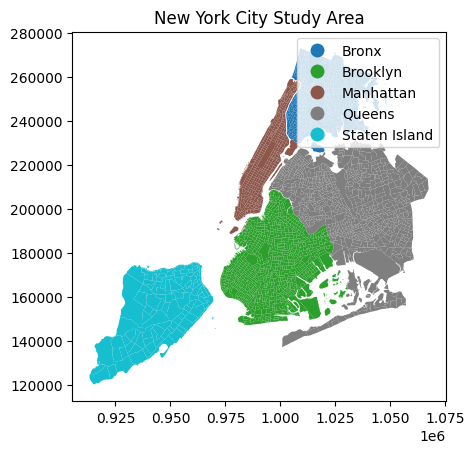

In [6]:
from pickle import TRUE
#Create a map of study area
gdf.plot(column='BoroName', legend=TRUE)
plt.title('New York City Study Area')

# Display the plot
plt.show()

In [7]:
gdf['Latitude'] = gdf['geometry'].centroid.y
gdf['Longitude'] = gdf['geometry'].centroid.x

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POLY_ID     2216 non-null   float64 
 1   YOUTH_DROP  2216 non-null   float64 
 2   PER_MNRTY   2216 non-null   float64 
 3   HS_DROP     2216 non-null   float64 
 4   COL_DEGREE  2216 non-null   float64 
 5   PER_ASIAN   2216 non-null   float64 
 6   PER_WHITE   2216 non-null   float64 
 7   PER_BLACK   2216 non-null   float64 
 8   CTLabel     2216 non-null   object  
 9   BoroCode    2216 non-null   object  
 10  BoroName    2216 non-null   object  
 11  CT2000      2216 non-null   object  
 12  BoroCT2000  2216 non-null   object  
 13  NTACode     2216 non-null   object  
 14  NTANAme     2216 non-null   object  
 15  PUMA        2216 non-null   object  
 16  Shape_Leng  2216 non-null   float64 
 17  Shape_Area  2216 non-null   float64 
 18  NP_CT       2216 non-null   float64 
 19

In [8]:
#Get columns I am interested in
gdf2 =['Latitude', 'Longitude', 'YOUTH_DROP', 'HS_DROP', 'COL_DEGREE', 'PER_MNRTY', 'mean_inc', 'PER_PRV_SC', 'GENDER_PAR', 'SCHOOL_CT', 'popdens']
newyork = gdf[gdf2]
newyork.head()

,Latitude,Longitude,YOUTH_DROP,HS_DROP,COL_DEGREE,PER_MNRTY,mean_inc,PER_PRV_SC,GENDER_PAR,SCHOOL_CT,popdens
0,203615.644187,988765.573063,0.000000,0.17,0.51,0.23,36759.0,0.47,0.9817,2,95199.270
1,204873.072108,989389.224829,0.121951,0.16,0.53,0.32,37371.0,0.56,1.1117,2,107889.400
2,209038.253562,988661.901632,0.000000,0.06,0.73,0.22,52442.0,0.62,0.9786,1,100415.600
3,210568.408412,983507.827236,0.058442,0.11,0.64,0.24,55198.0,0.48,1.1803,8,84076.660
4,214845.077090,989545.452338,0.000000,0.07,0.72,0.48,60083.0,1.00,1.3596,0,3144.861


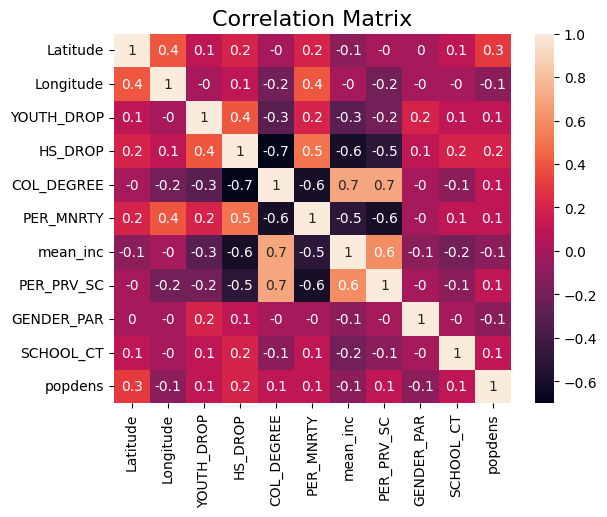

In [9]:
#Create correlation table to see which have greatest correlation
corr_matrix = newyork.corr()
corr_matrix_2dp =(round(corr_matrix, 1))
sns.heatmap(corr_matrix_2dp, annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

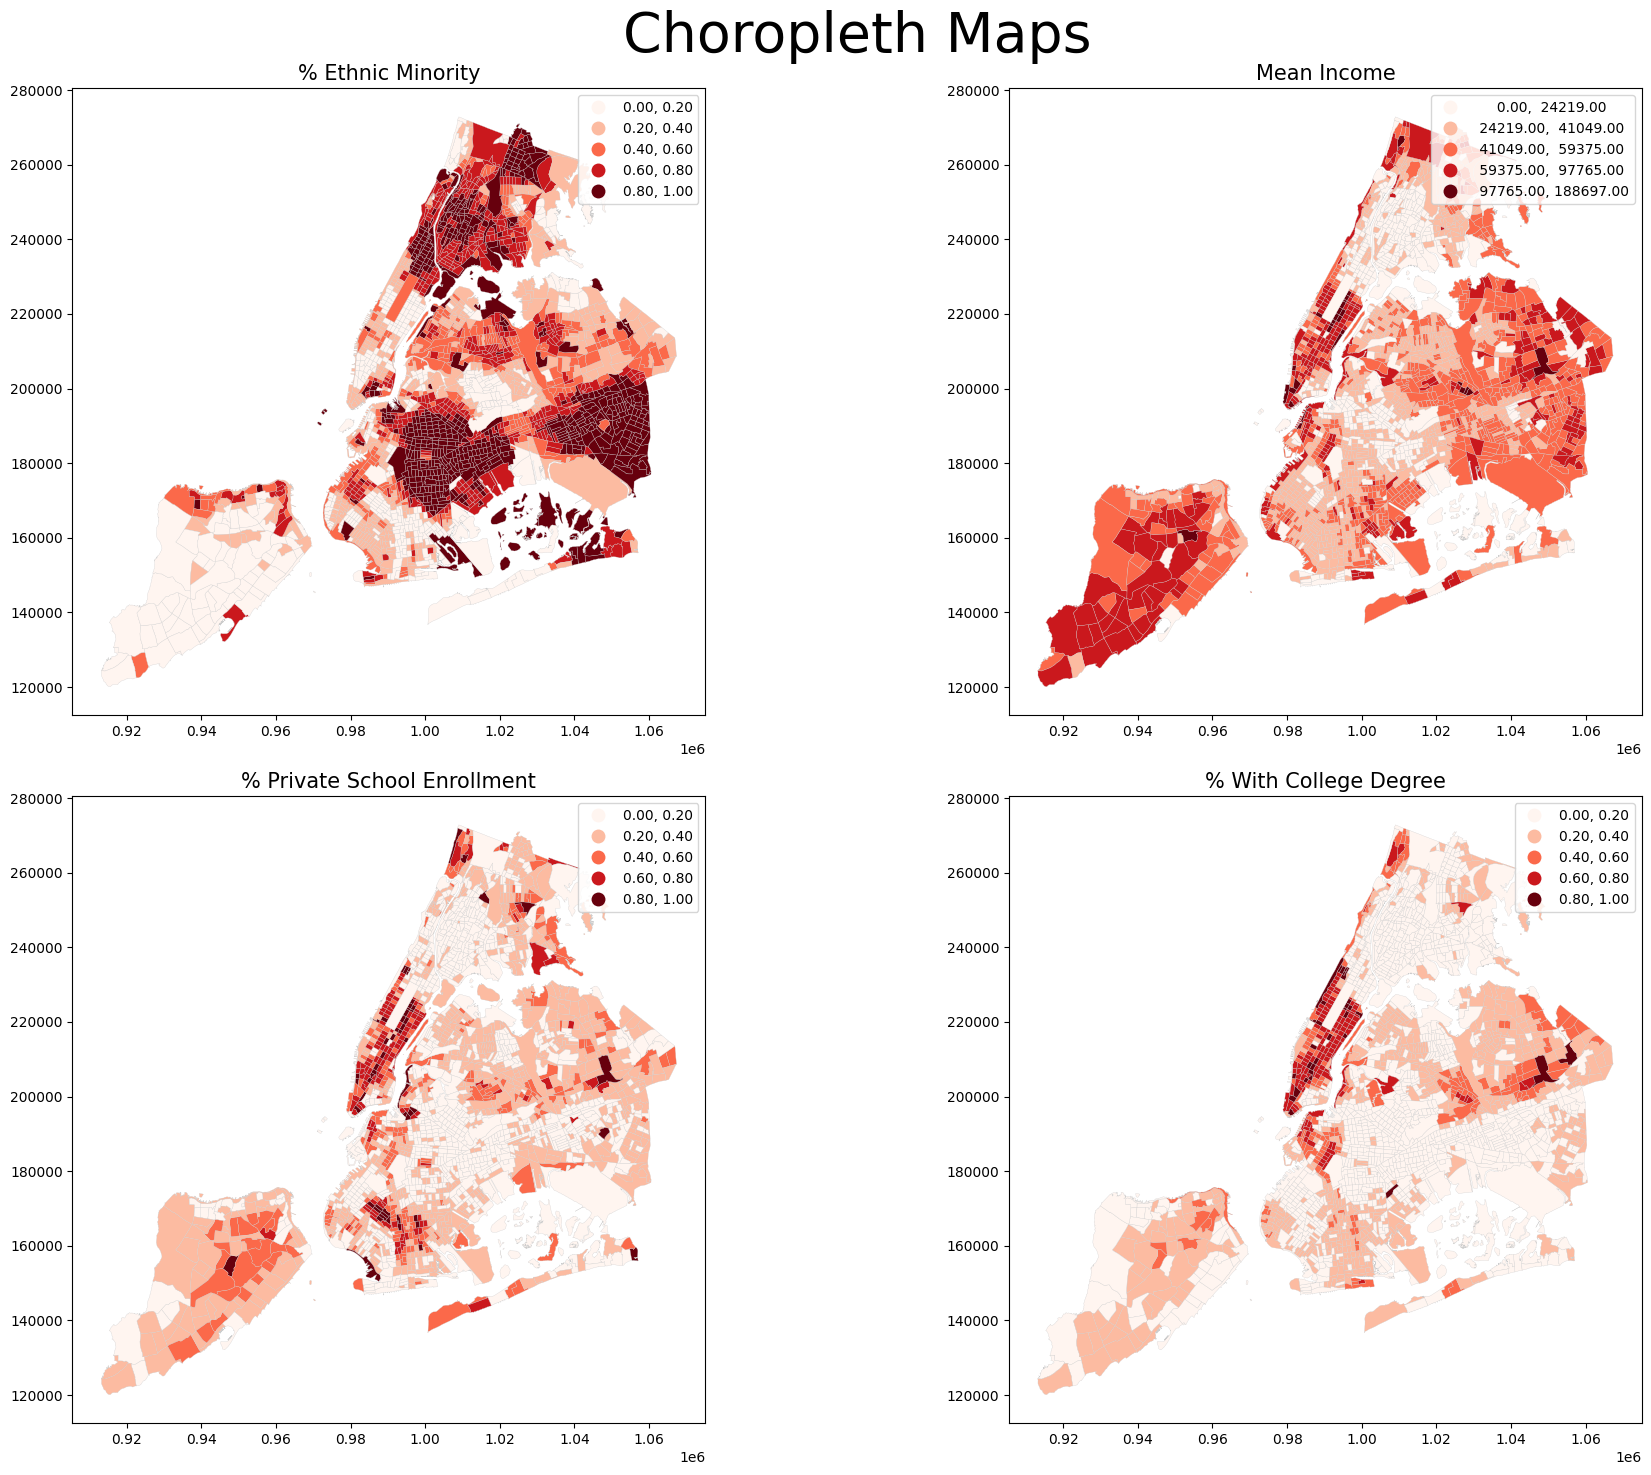

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
gdf.plot(ax=axes[0,1], column='mean_inc', cmap='Reds', linewidth=0.2, edgecolor='0.8', legend=True, scheme='naturalbreaks')
axes[0,1].set_title('Mean Income', fontdict={'fontsize': '15', 'fontweight' : '3'})

gdf.plot(ax=axes[0,0], column='PER_MNRTY', cmap='Reds', linewidth=0.2, edgecolor='0.8', legend=True, scheme='equalinterval')
axes[0,0].set_title('% Ethnic Minority', fontdict={'fontsize': '15', 'fontweight' : '3'})

gdf.plot(ax=axes[1,0], column='PER_PRV_SC', cmap='Reds', linewidth=0.2, edgecolor='0.8', legend=True, scheme='equalinterval')
axes[1,0].set_title('% Private School Enrollment', fontdict={'fontsize': '15', 'fontweight' : '3'})

gdf.plot(ax=axes[1,1], column='COL_DEGREE', cmap='Reds', linewidth=0.2, edgecolor='0.8', legend=True, scheme='equalinterval')
axes[1,1].set_title('% With College Degree', fontdict={'fontsize': '15', 'fontweight' : '3'})

fig.suptitle('Choropleth Maps', fontsize=40)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


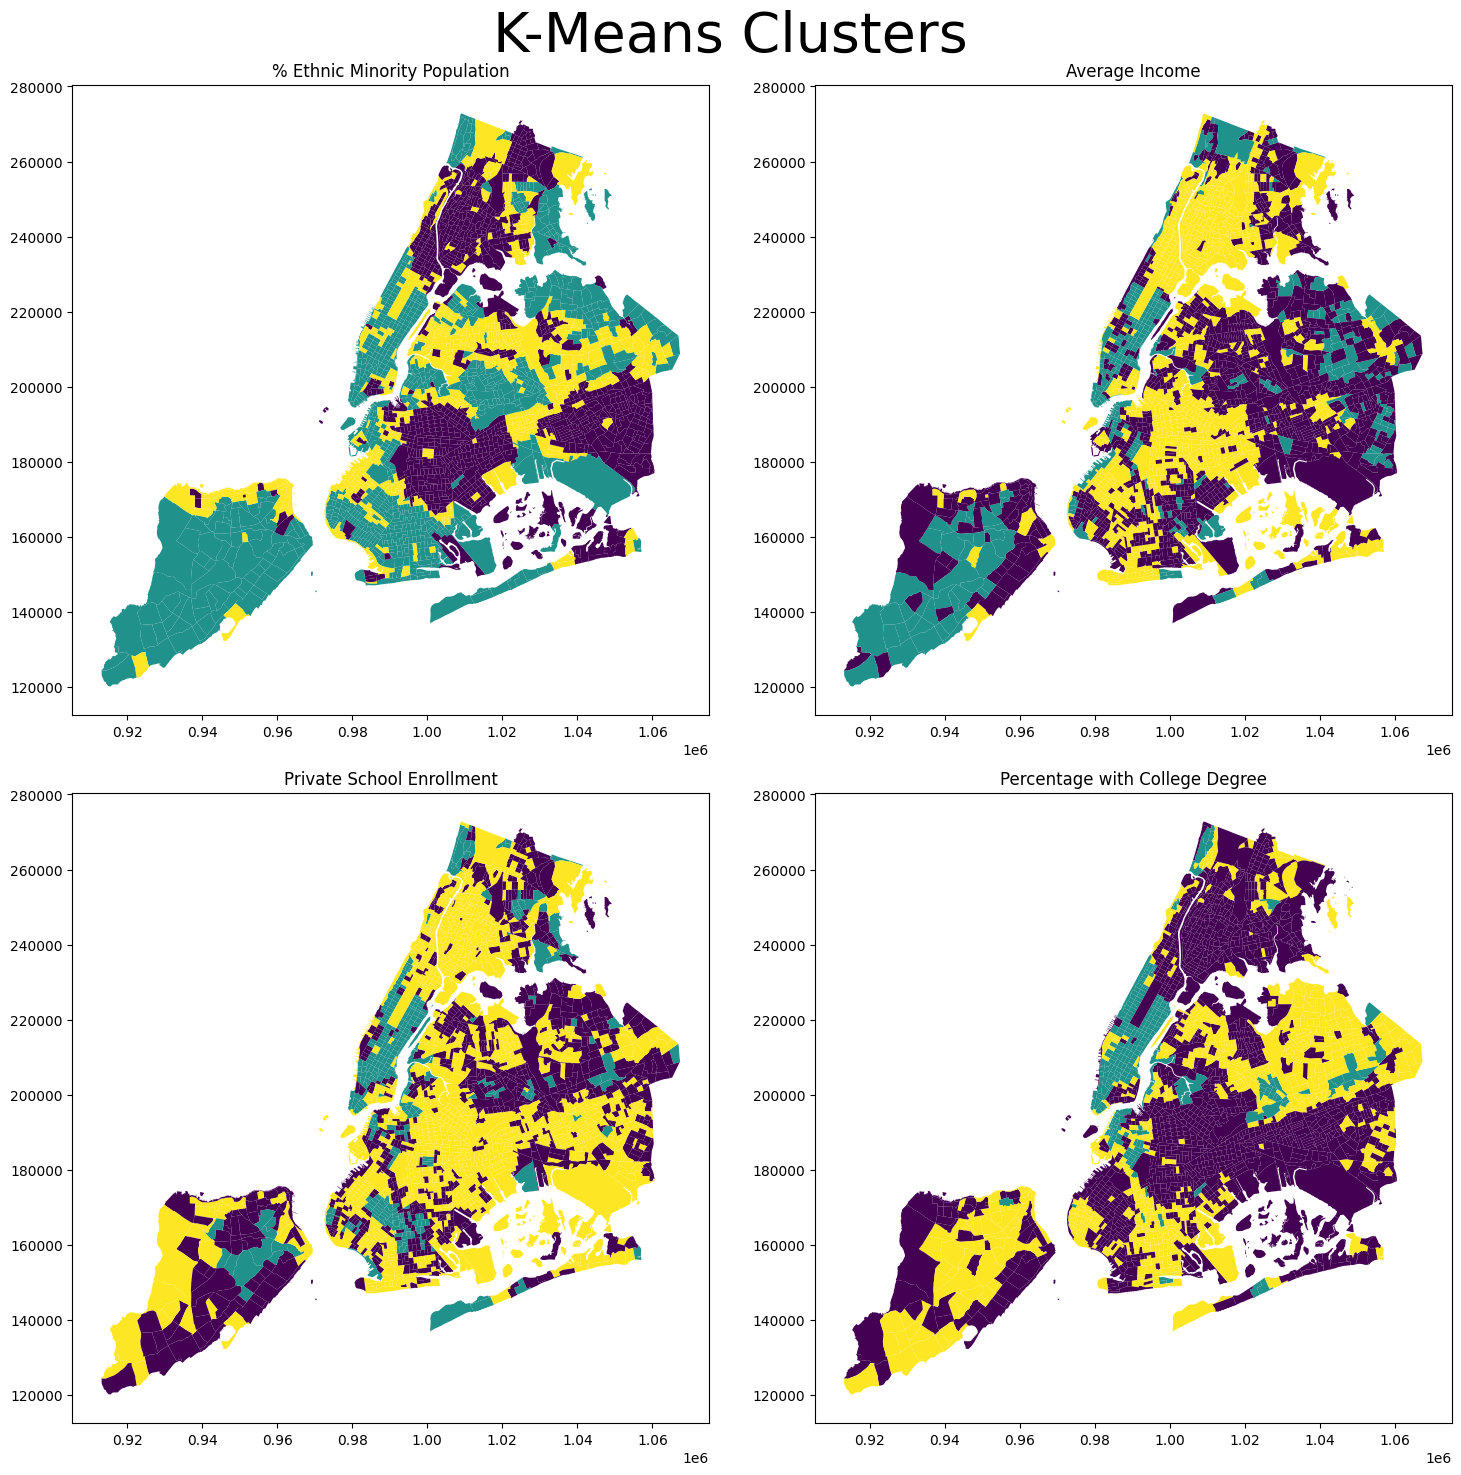

In [ ]:
from ssl import get_default_verify_paths
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# MEAN INCOME
income = gdf[['mean_inc']].values

kmeans2 = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans2.fit(income)
gdf['income_cluster'] = kmeans2.labels_

axes[0,1].set_title('Average Income')
gdf.plot(ax=axes[0,1], column='income_cluster', cmap='viridis', legend=False)

# PRIVATE SCHOOLS
privsc = gdf[['PER_PRV_SC']].values

kmeans_priv = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans_priv.fit(privsc)
gdf['Per_priv'] = kmeans_priv.labels_

axes[1,0].set_title('Private School Enrollment')
gdf.plot(ax=axes[1,0], column='Per_priv', cmap='viridis', legend=False)

#College Degree
col_d = gdf[['COL_DEGREE']].values

kmeans_col = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans_col.fit(col_d)
gdf['cold'] = kmeans_col.labels_

axes[1,1].set_title('Percentage with College Degree')
gdf.plot(ax=axes[1,1], column='cold', cmap='viridis', legend=False)

#Ethminority
ethmin = gdf[['PER_MNRTY']].values

kmeans_em = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans_em.fit(ethmin)
gdf['EthnicMinority'] = kmeans_em.labels_

axes[0,0].set_title('% Ethnic Minority Population')
gdf.plot(ax=axes[0,0], column='EthnicMinority', cmap='viridis', legend=False)

fig.suptitle('K-Means Clusters', fontsize=40)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
gdf['mean_inc'].describe()

count      2216.00000
mean      40074.07130
std       20462.81917
min           0.00000
25%       26871.50000
50%       37653.50000
75%       51071.00000
max      188697.00000
Name: mean_inc, dtype: float64

In [ ]:
gdf['COL_DEGREE'].describe()

count    2216.000000
mean        0.731949
std         0.906654
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         2.000000
Name: COL_DEGREE, dtype: float64

In [ ]:
gdf['PER_PRV_SC'].describe()

count    2216.000000
mean        0.283141
std         0.194384
min         0.000000
25%         0.150000
50%         0.230000
75%         0.360000
max         1.000000
Name: PER_PRV_SC, dtype: float64

In [ ]:
gdf['HS_DROP'].describe()

count    2216.000000
mean        0.282906
std         0.156451
min         0.000000
25%         0.170000
50%         0.270000
75%         0.380000
max         1.000000
Name: HS_DROP, dtype: float64

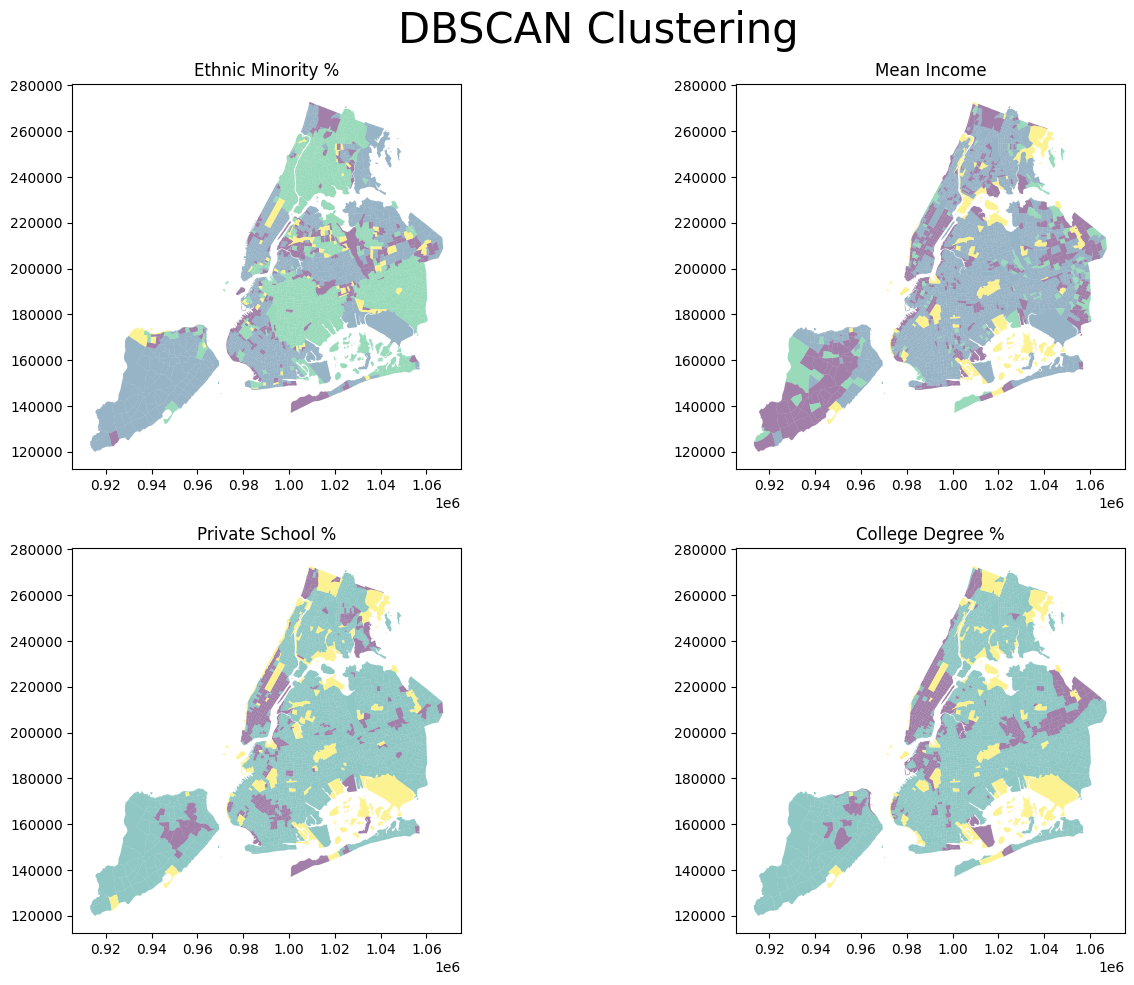

In [ ]:
# Visualize clustering results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#income
dbscan1 = DBSCAN(eps=1000, min_samples=50)
gdf['cluster_income2'] = dbscan1.fit_predict(income)

gdf.plot(ax=axes[0,1], column='cluster_income2', categorical=False, alpha =0.5, cmap='viridis')
axes[0,1].set_title('Mean Income')

#College Degree
dbscan2 = DBSCAN(eps=0.015, min_samples=50)
gdf['cold2'] = dbscan2.fit_predict(col_d)

gdf.plot(ax=axes[1,1], column='cold2', categorical=False, alpha =0.5, cmap='viridis')
axes[1,1].set_title('College Degree %')

#Private school
dbscan3 = DBSCAN(eps=0.015, min_samples=50)
gdf['cluster_priv2'] = dbscan3.fit_predict(privsc)

gdf.plot(ax=axes[1,0], column='cluster_priv2', categorical=False, alpha =0.5, cmap='viridis')
axes[1,0].set_title('Private School %')

#Ethminority
dbscan4 = DBSCAN(eps=0.015, min_samples=50)
gdf['em2'] = dbscan4.fit_predict(ethmin)

gdf.plot(ax=axes[0,0], column='em2', categorical=False, alpha =0.5, cmap='viridis')
axes[0,0].set_title('Ethnic Minority %')


fig.suptitle('DBSCAN Clustering', fontsize=30)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()
plt.show()